<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/cabecalho.png" alt="cabecalho">

# Exploração e análise de dados de crédito com SQL
por Carlos Augusto

# Introdução

Este projeto tem como objetivo realizar uma análise exploratória de dados (EDA) sobre informações de crédito, buscando compreender o perfil dos clientes, identificar padrões de comportamento financeiro e detectar possíveis fatores que influenciam a concessão ou inadimplência de crédito.

A partir da exploração dos dados, serão analisadas variáveis como renda, idade, histórico de pagamento, limite de crédito e pontuação de risco, permitindo gerar insights que auxiliem na tomada de decisão e na construção de modelos preditivos mais assertivos.

Essa etapa é fundamental para garantir a qualidade, consistência e relevância dos dados, além de orientar as próximas fases de modelagem e análise estatística.

# Os dados:
**Os dados representam informações de clientes de um banco e contam com as seguintes colunas:**

idade = idade do cliente

sexo = sexo do cliente (F ou M)

dependentes = número de dependentes do cliente

escolaridade = nível de escolaridade do clientes

salario_anual = faixa salarial do cliente

tipo_cartao = tipo de cartao do cliente

qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

meses_inativo_12m = quantidade de meses que o cliente ficou inativo

limite_credito = limite de credito do cliente

valor_transacoes_12m = valor das transações dos ultimos 12 meses

qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# Exploração de dados:

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

**Qual a quantidade de informações temos na nossa base de dados?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/1%20-%20qtd_linhas.PNG" alt="qtd_linhas">

Query: SELECT count(*) FROM credito

**Como estão organizados os dados que iremos utilizar?**



<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/2%20-%20organiza%C3%A7%C3%A3o%20dos%20dados.PNG" alt="organizacao_dos_dados">

Query: SELECT * FROM credito LIMIT 10

É possível observar que a tabela contém alguns valores ausentes (Na). Vamos analisar mais detalhadamente os dados de cada coluna para entender melhor essas ausências.


**Quais os tipos de cada dado?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/3%20-%20describe.PNG" alt="describe">

Query: DESCRIBE credito

Agora que já identificamos os tipos de dados presentes, vamos examinar com mais atenção as variáveis que não são numéricas.

**Quais são os tipos de escolaridade disponíveis no dataset?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/4%20-%20escolaridade.PNG" alt="escolaridade">

Query: SELECT DISTINCT escolaridade FROM credito

Os dados apresentam diversos níveis de escolaridade e, ao analisá-los, é possível notar a presença de valores ausentes (Na) no conjunto. Faremos o tratamento desses valores posteriormente.


**Quais são os tipos de estado_civil disponíveis no dataset?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/5%20-%20estado_civil.PNG" alt="estado_civil">

Query: SELECT DISTINCT estado_civil FROM credito

Vale destacar que foram identificados mais dados nulos na coluna estado_civil

**Quais são os tipos de salario_anual disponíveis no dataset?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/6%20-%20salario_anual.PNG" alt="salario_anual">

Query: SELECT DISTINCT salario_anual FROM credito

Os salários neste dataset não estão representados pelos valores exatos de rendimento dos clientes, mas sim por **faixas salariais**. Além disso, é possível observar a presença de **valores ausentes (Na)** nessa variável também.


**Quais são os tipos de cartão disponíveis no dataset?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/7%20-%20tipo_cartao.PNG" alt="tipo_cartao">

Query: SELECT DISTINCT tipo_cartao FROM credito

Aqui notamos a existência de 4 categorias de cartão de crédito e a ausência de dados faltantes nessa coluna

# Análise de dados

Depois de explorarmos os dados e compreendermos quais informações estão disponíveis no nosso banco de dados, podemos partir para a análise, buscando identificar padrões e insights. Para isso, começamos fazendo perguntas, como por exemplo:

**Quantos clientes existem em cada faixa salarial presente no banco de dados?**


<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/8%20-%20quantos%20clientes%20recebem%20determinado%20sal%C3%A1rio.PNG" alt="qtd_clientes_salario">

Query: select count(*), salario_anual from credito group by salario_anual

A maior parte dos clientes dessa base apresenta uma renda inferior a 40 mil, e há 235 clientes cuja faixa salarial não foi informada ou não consta no cadastro. Portanto, pode ser estratégico para a empresa direcionar esforços e ações para o público de menor renda.

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/9%20-%20qtd%20homens%20e%20mulheres.PNG" alt="qtd_homens_mulheres">

Query: select count(*) as qtd_genero, sexo from credito group by sexo

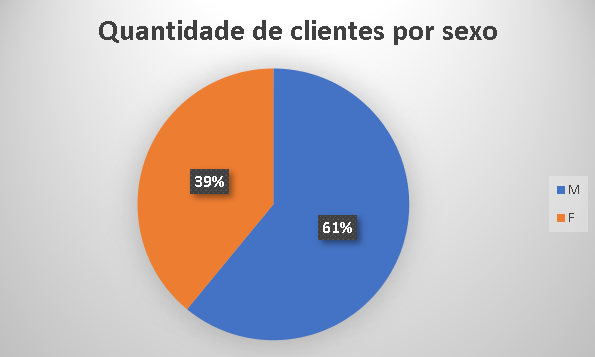

Os clientes do sexo masculino são a maioria! Do csv extraído dos dados é possível gerar o gráfico em pizza para melhorar a visualização da proporção de masculino/feminino

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/11.PNG" alt="media_idades">

Query: select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

Por meio dessa análise não foi possível extrair nenhuma informação relevante. A menor idade dos dois sexos é a mesma e a média é muito similar. A unica diferença é a idade máxima mas fato quase irrelevante por a diferença não é tão gritante.

**Qual a maior e menor transação dos clientes?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/12.PNG" alt="maior_menor_transacao">

Query: select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito

Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 5776.58

**Quais as características dos clientes que possuem os maiores creditos?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/13.PNG" alt="maiores_creditos">

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

Não parece haver um impacto da escolaridade no limite. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

**Quais as características dos clientes que possuem os menores creditos?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/14.PNG" alt="menores_creditos">

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc

Dessa vez conseguimos perceber que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites são mulheres enquanto nos maiores limites predomina homens.

**Será que as mulheres gastam mais?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/15.PNG" alt="gasto_mulheres">

Query: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

Apesar da diferença nos limites, os gastos de homens e mulheres são similares!

**O salário impacta no limite?**

<img src="https://raw.githubusercontent.com/AugustoInData/AugustoInData/refs/heads/main/images/imgens_projeto_analise_de_cr%C3%A9dito_com_sql/16.PNG" alt="salario_limite">

Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

Sim, quanto maior o salário maior o limite de crédito. Vale destacar que as pessoas que tem menor faixa salarial também apresentam menor limite de credito!

# Conclusão

As análises extraídas do **dataset de crédito** revelam padrões claros, especialmente em relação à **renda** e ao **gênero** dos clientes.

### Principais Padrões Observados:

* **Renda e Perfil da Base:** A **maioria** da base de clientes possui **renda anual de até \$40K**, indicando que o portfólio de crédito é predominantemente de classe média ou abaixo. Além disso, a base é majoritariamente **masculina**.
* **Impacto da Renda:** A **faixa salarial impacta diretamente o limite de crédito** concedido. Clientes com renda mais alta tendem a ter limites maiores.
* **Influência do Gênero no Limite e Produtos:**
    * Há uma disparidade notável nos limites de crédito por gênero: clientes com os **maiores limites são predominantemente homens**, enquanto clientes com os **menores limites são majoritariamente mulheres**.
    * Essa disparidade se reflete nos produtos: o **cartão Platinum** está ausente entre os clientes com os menores limites (maioria feminina).
    * A base de clientes **não possui mulheres** com um salário anual **acima de \$60K**, o que é um fator chave para a concentração de altos limites no público masculino.

---

### Insights e Próximos Passos:

Enquanto a **escolaridade não demonstrou influenciar** o limite ou o tipo de cartão, o **gênero** e a **renda** são as variáveis mais decisivas.

É fundamental aprofundar a investigação sobre a ausência de clientes femininas na faixa salarial mais alta. Essa correlação entre gênero, teto salarial e limites de crédito sugere a necessidade de examinar as **políticas de aquisição** e os **critérios de avaliação de crédito** para garantir que sejam **equitativas** e para identificar oportunidades de expandir a oferta de produtos *premium* para clientes femininas de alto potencial.

Essa análise serve como um ponto de partida para revisões estratégicas focadas em **diversidade de clientes** e **otimização da concessão de crédito**.